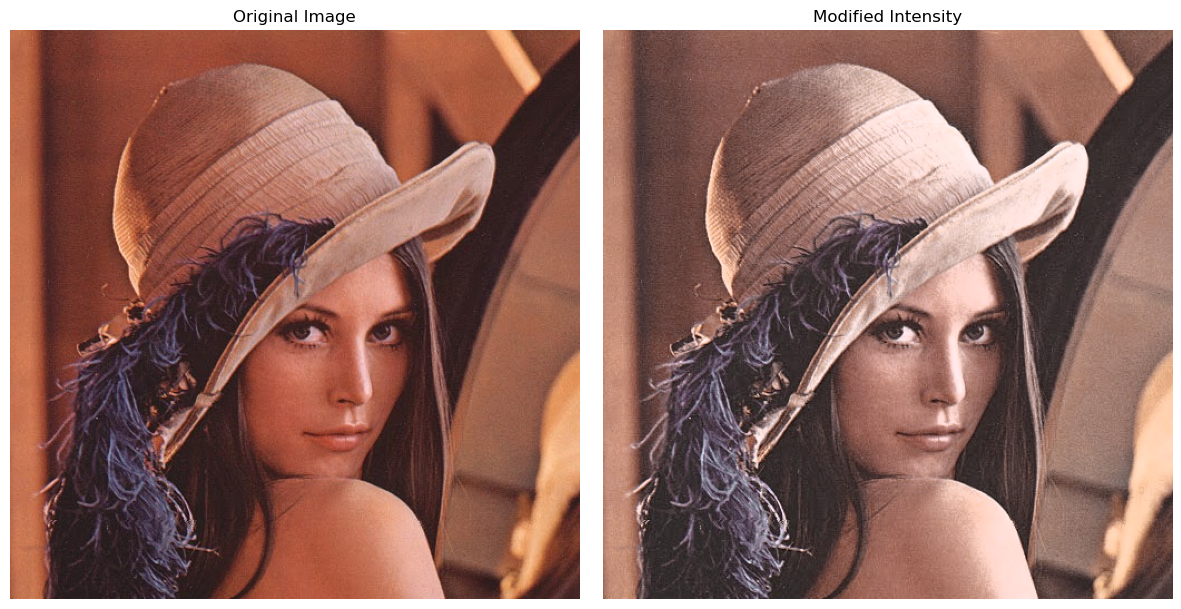

In [3]:
"""
# **Program Explanation: Color Transformation using HSI Model**

## **Introduction**
This program demonstrates the concept of **color transformation** by modifying the intensity component of an image represented in the HSI (Hue, Saturation, Intensity) color model. The HSI model is particularly useful for applications where separation of chromatic content (hue and saturation) from intensity is desired.

## **HSI Color Model**
The HSI model represents colors in terms of:
1. **Hue (H):** Represents the type of color (e.g., red, green, blue) and is typically measured in degrees (0–360°).
2. **Saturation (S):** Indicates the purity of the color (0 for grayscale and 1 for pure color).
3. **Intensity (I):** Corresponds to the brightness of the color, ranging from 0 (dark) to 1 (bright).

This separation allows easy manipulation of the intensity (brightness) without altering the hue or saturation, making it ideal for applications like contrast adjustment and brightness enhancement.

## **Purpose of the Program**
The purpose of this program is to:
1. Convert an image from the RGB (Red, Green, Blue) color model to the HSI model.
2. Modify the intensity (I) component of the HSI image to demonstrate a color transformation effect.
3. Convert the modified HSI image back to the RGB model for visualization.

## **Steps in the Program**
1. **Image Loading:**
   - Load the input image in RGB format.

2. **Conversion to HSI:**
   - Convert the RGB image into the HSI color model using mathematical formulas.

3. **Intensity Modification:**
   - Enhance the intensity (brightness) of the HSI image by scaling the intensity component.

4. **Back Conversion to RGB:**
   - Convert the modified HSI image back to the RGB model for display and comparison.

5. **Visualization:**
   - Display the original and intensity-modified images side by side using Matplotlib.

## **Why HSI for Transformation?**
- In the RGB model, changes in brightness often affect the chromaticity (color perception) as well. However, in the HSI model, the chromaticity components (H and S) are isolated, allowing pure intensity adjustments.
- This makes the HSI model ideal for tasks like image enhancement, contrast improvement, and color analysis.

## **Applications**
- Brightness and contrast adjustments in images.
- Image preprocessing for computer vision tasks.
- Feature extraction in machine learning.
- Color-based segmentation and detection in image analysis.

## **Key Functions**
1. **rgb_to_hsi:** Converts an RGB image to the HSI color model.
2. **hsi_to_rgb:** Converts an HSI image back to the RGB color model.
3. **Visualization:** Displays the original and transformed images for comparison.

## **Program Output**
- The original image (unmodified).
- The intensity-modified image demonstrating brightness enhancement in the HSI model.

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to convert RGB to HSI
def rgb_to_hsi(image):
    image = image / 255.0  # Normalize RGB values
    R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    intensity = (R + G + B) / 3  # Intensity calculation

    # Hue and Saturation calculation
    numerator = 0.5 * ((R - G) + (R - B))
    denominator = np.sqrt((R - G)**2 + (R - B) * (G - B))
    theta = np.arccos(np.clip(numerator / (denominator + 1e-6), -1, 1))
    hue = np.where(B <= G, theta, 2 * np.pi - theta)
    hue = hue / (2 * np.pi)  # Normalize hue to [0, 1]

    saturation = 1 - (3 / (R + G + B + 1e-6) * np.minimum(R, np.minimum(G, B)))

    # Combine into HSI
    HSI = np.stack((hue, saturation, intensity), axis=-1)
    return HSI

# Function to convert HSI to RGB
def hsi_to_rgb(hsi_image):
    hue, saturation, intensity = hsi_image[:, :, 0], hsi_image[:, :, 1], hsi_image[:, :, 2]
    hue = hue * 2 * np.pi  # Convert hue back to radians

    R, G, B = np.zeros_like(hue), np.zeros_like(hue), np.zeros_like(hue)

    # RGB calculation based on hue
    sector = (hue / (np.pi / 3)).astype(int) % 6
    f = hue / (np.pi / 3) - sector
    p = intensity * (1 - saturation)
    q = intensity * (1 - f * saturation)
    t = intensity * (1 - (1 - f) * saturation)

    # Assign RGB values based on sector
    R[(sector == 0)] = intensity[(sector == 0)]
    G[(sector == 0)] = t[(sector == 0)]
    B[(sector == 0)] = p[(sector == 0)]

    R[(sector == 1)] = q[(sector == 1)]
    G[(sector == 1)] = intensity[(sector == 1)]
    B[(sector == 1)] = p[(sector == 1)]

    R[(sector == 2)] = p[(sector == 2)]
    G[(sector == 2)] = intensity[(sector == 2)]
    B[(sector == 2)] = t[(sector == 2)]

    R[(sector == 3)] = p[(sector == 3)]
    G[(sector == 3)] = q[(sector == 3)]
    B[(sector == 3)] = intensity[(sector == 3)]

    R[(sector == 4)] = t[(sector == 4)]
    G[(sector == 4)] = p[(sector == 4)]
    B[(sector == 4)] = intensity[(sector == 4)]

    R[(sector == 5)] = intensity[(sector == 5)]
    G[(sector == 5)] = p[(sector == 5)]
    B[(sector == 5)] = q[(sector == 5)]

    RGB = np.stack((R, G, B), axis=-1)
    return (RGB * 255).astype(np.uint8)


# Define the image path
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path

# Load the RGB image
rgb_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert RGB to HSI
hsi_image = rgb_to_hsi(rgb_image)

# Modify the intensity (increase by 50%)
modified_hsi = hsi_image.copy()
modified_hsi[:, :, 2] = np.clip(modified_hsi[:, :, 2] * 1.5, 0, 1)

# Convert HSI back to RGB
modified_rgb_image = hsi_to_rgb(modified_hsi)

# Visualize the original and modified images
titles = ["Original Image", "Modified Intensity"]
images = [rgb_image, modified_rgb_image]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, title, img in zip(axes, titles, images):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
